<a href="https://colab.research.google.com/github/Ludwig018/hello-world/blob/master/retail_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


data = pd.read_excel("Retail_Dataset.xlsx")
data

,CustomerID,Date,Number of Product Sold,Sales Amount,Marketing Expenditure,Location,Frequency,Product_Category_Preferences
0,0,2023-09-18,13,$67.66,2517.141508,Lebach,5,clothing
1,1,2023-04-03,6,$94.69,4160.86236,Guben,5,home appliances
2,2,2023-08-19,15,$63.32,3385.65198,K√∂then,0,clothing
3,3,2022-10-17,11,$15.76,4238.458102,Strausberg,9,sports equipments
4,4,2022-05-02,3,$91.21,3568.594787,Wittenberg,10,electronics
...,...,...,...,...,...,...,...,...
495,495,2023-09-18,3,$79.44,$445.38,Stralsund,7,electronics
496,496,2023-04-03,1,$4.12,$397.49,Chemnitz,3,home appliances
497,497,2023-08-19,6,$87.29,$37.87,Dresden,5,electronics
498,498,2022-10-17,6,$36.69,$201.49,Schifferstadt,7,home appliances


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   CustomerID                    500 non-null    int64         
 1   Date                          500 non-null    datetime64[ns]
 2     Number of Product Sold      500 non-null    int64         
 3   Sales Amount                  500 non-null    object        
 4   Marketing Expenditure         500 non-null    object        
 5   Location                      500 non-null    object        
 6   Frequency                     500 non-null    int64         
 7   Product_Category_Preferences  500 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 31.4+ KB


In [ ]:
convert_columns = ['Sales_Amount', 'Marketing_Expenditure']

for column in convert_columns:
  data[convert_columns] = data[convert_columns].astype(int)

print(data.dtypes)

KeyError: "None of [Index(['Sales_Amount', 'Marketing_Expenditure'], dtype='object')] are in the [columns]"

In [ ]:
label_encoder = LabelEncoder()

data['Location_Encoded'] = label_encoder.fit_transform(data['Location'])

print(data)
data.head()

     CustomerID       Date    Number of Product Sold  Sales Amount   \
0             0 2023-09-18                         13        $67.66   
1             1 2023-04-03                          6        $94.69   
2             2 2023-08-19                         15        $63.32   
3             3 2022-10-17                         11        $15.76   
4             4 2022-05-02                          3        $91.21   
..          ...        ...                        ...           ...   
495         495 2023-09-18                          3        $79.44   
496         496 2023-04-03                          1         $4.12   
497         497 2023-08-19                          6        $87.29   
498         498 2022-10-17                          6        $36.69   
499         499 2022-05-02                          8        $49.61   

    Marketing Expenditure        Location  Frequency  \
0              4704.945576         Lebach          5   
1              3758.810586         

,CustomerID,Date,Number of Product Sold,Sales Amount,Marketing Expenditure,Location,Frequency,Product_Category_Preferences,Location_Encoded
0,0,2023-09-18,13,$67.66,4704.945576,Lebach,5,clothing,106
1,1,2023-04-03,6,$94.69,3758.810586,Guben,5,home appliances,64
2,2,2023-08-19,15,$63.32,2941.785994,K√∂then,0,clothing,102
3,3,2022-10-17,11,$15.76,2226.32787,Strausberg,9,sports equipments,186
4,4,2022-05-02,3,$91.21,1658.447291,Wittenberg,10,electronics,207


In [ ]:
d_v_c = data['Location'].nunique()
d_v_c

215

In [ ]:
data.isnull()

,CustomerID,Date,Number of Product Sold,Sales Amount,Marketing Expenditure,Location,Frequency,Product_Category_Preferences,Location_Encoded
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Remove rows with missing values
data.dropna(subset=['Sales Amount', 'Marketing Expenditure'], inplace=True)

# Fill missing values with mean
#mean_sales_amount = data['Sales Amount'].mean()
#mean_marketing_expenditure = data['Marketing Expenditure'].mean()
#data['Sales Amount'].fillna(mean_sales_amount, inplace=True)
#data['Marketing Expenditure'].fillna(mean_marketing_expenditure, inplace=True)


CustomerID                      0.0
Date                            0.0
Number of Product Sold          0.0
Sales Amount                    0.0
Marketing Expenditure           0.0
Location                        0.0
Frequency                       0.0
Product_Category_Preferences    0.0
dtype: float64


In [ ]:

data.isna()

,CustomerID,Date,Number of Product Sold,Sales Amount,Marketing Expenditure,Location,Frequency,Product_Category_Preferences,Location_Encoded
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [ ]:
# Remove leading and trailing whitespaces from column names
data.columns = data.columns.str.strip()

In [ ]:
data["Sales Amount"] = data["Sales Amount"].str.split(pat='$').str[1]

In [ ]:
print(data.columns)
data.head()

Index(['CustomerID', 'Date', 'Number of Product Sold', 'Sales Amount',
       'Marketing Expenditure', 'Location', 'Frequency',
       'Product_Category_Preferences', 'Location_Encoded'],
      dtype='object')


,CustomerID,Date,Number of Product Sold,Sales Amount,Marketing Expenditure,Location,Frequency,Product_Category_Preferences,Location_Encoded
0,0,2023-09-18,13,67.66,4704.945576,Lebach,5,clothing,106
1,1,2023-04-03,6,94.69,3758.810586,Guben,5,home appliances,64
2,2,2023-08-19,15,63.32,2941.785994,K√∂then,0,clothing,102
3,3,2022-10-17,11,15.76,2226.32787,Strausberg,9,sports equipments,186
4,4,2022-05-02,3,91.21,1658.447291,Wittenberg,10,electronics,207


In [ ]:
#Exploratory Data Analysis(To help us analyze the mean, median, and standard deviation)
#data.describe()
data.describe()

,CustomerID,Date,Number of Product Sold,Frequency,Location_Encoded
count,500.000000,500,500.000000,500.000000,500.000000
mean,249.500000,2023-02-22 09:36:00,7.608000,5.370000,99.254000
min,0.000000,2022-05-02 00:00:00,0.000000,0.000000,0.000000
25%,124.750000,2022-10-17 00:00:00,4.000000,3.000000,39.750000
50%,249.500000,2023-04-03 00:00:00,7.500000,5.000000,94.500000
75%,374.250000,2023-08-19 00:00:00,12.000000,8.000000,157.000000
max,499.000000,2023-09-18 00:00:00,15.000000,10.000000,214.000000
std,144.481833,NaN,4.404217,2.970311,63.294501


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

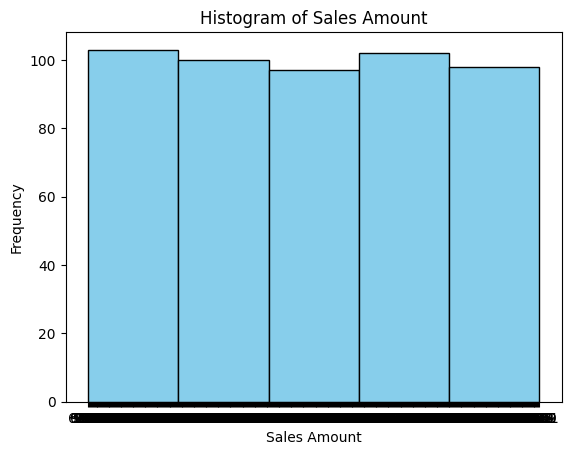

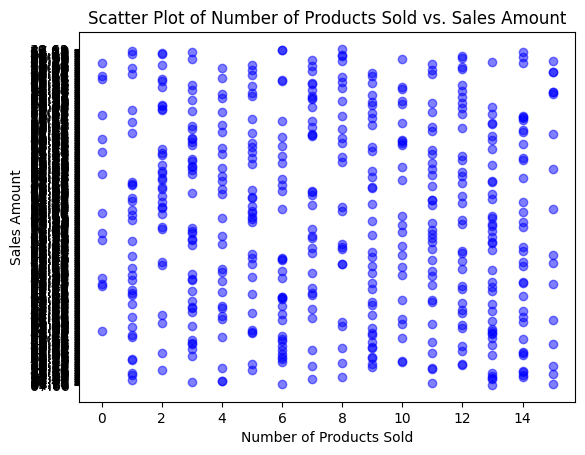

In [ ]:
# Histogram for Sales Amount
plt.hist(data['Sales Amount'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

# Scatter plot with Sales Amount as an indicator
plt.scatter(data['Number of Product Sold'], data['Sales Amount'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Number of Products Sold vs. Sales Amount')
plt.xlabel('Number of Products Sold')
plt.ylabel('Sales Amount')
plt.show()


In [ ]:


# Convert "Sales Amount" to numeric
data['Sales Amount'] = data['Sales Amount'].replace('[\$,]', '', regex=True).astype(float)

# Create a new feature: Log of Sales Amount (handle zero or negative values if necessary)
data['Log Sales Amount'] = np.log1p(data['Sales Amount'])

# Create a new feature: Cumulative Sales Amount
data['Cumulative Sales Amount'] = data['Sales Amount'].cumsum()

# Create a new feature: Sales Amount Bins (e.g., low, medium, high)
bins = [0, 50, 100, np.inf]
labels = ['Low', 'Medium', 'High']
data['Sales Amount Bin'] = pd.cut(data['Sales Amount'], bins=bins, labels=labels)

# Display the DataFrame with new features
print(data)


     CustomerID       Date  Number of Product Sold  Sales Amount  \
0             0 2023-09-18                      13         67.66   
1             1 2023-04-03                       6         94.69   
2             2 2023-08-19                      15         63.32   
3             3 2022-10-17                      11         15.76   
4             4 2022-05-02                       3         91.21   
..          ...        ...                     ...           ...   
495         495 2023-09-18                       3         79.44   
496         496 2023-04-03                       1          4.12   
497         497 2023-08-19                       6         87.29   
498         498 2022-10-17                       6         36.69   
499         499 2022-05-02                       8         49.61   

    Marketing Expenditure       Location  Frequency  \
0             4704.945576         Lebach          5   
1             3758.810586          Guben          5   
2             2941

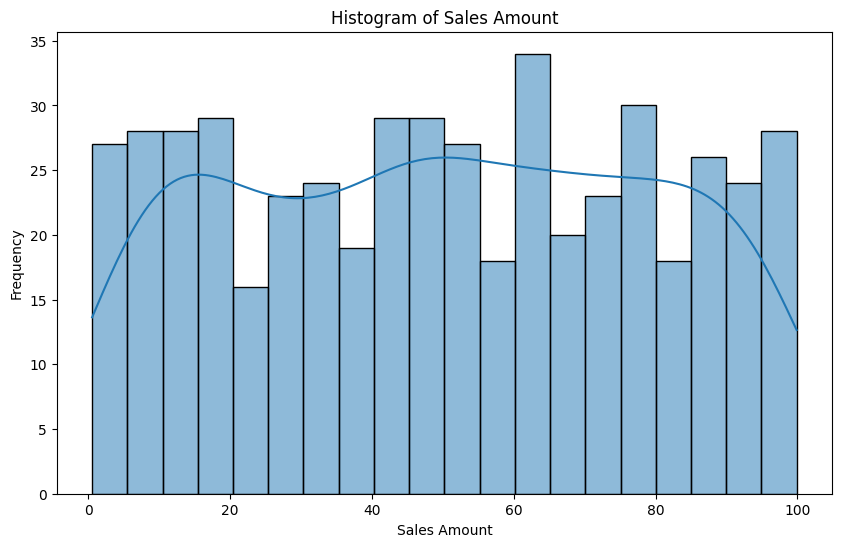

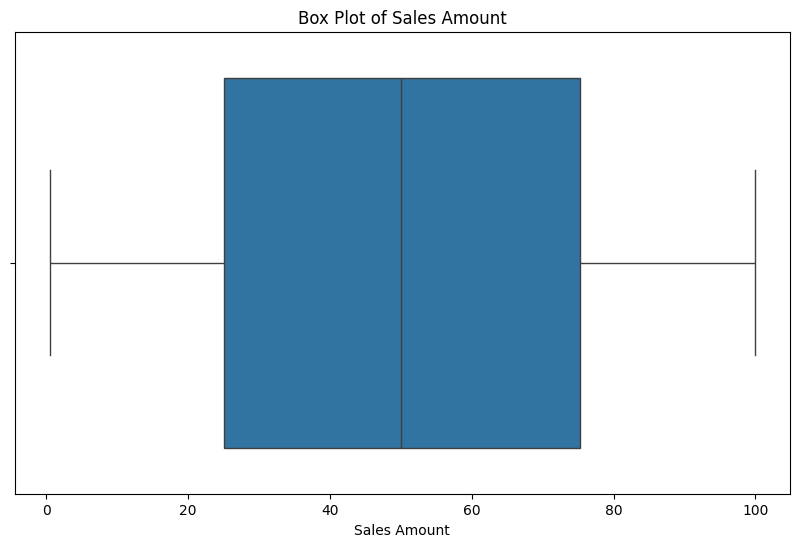

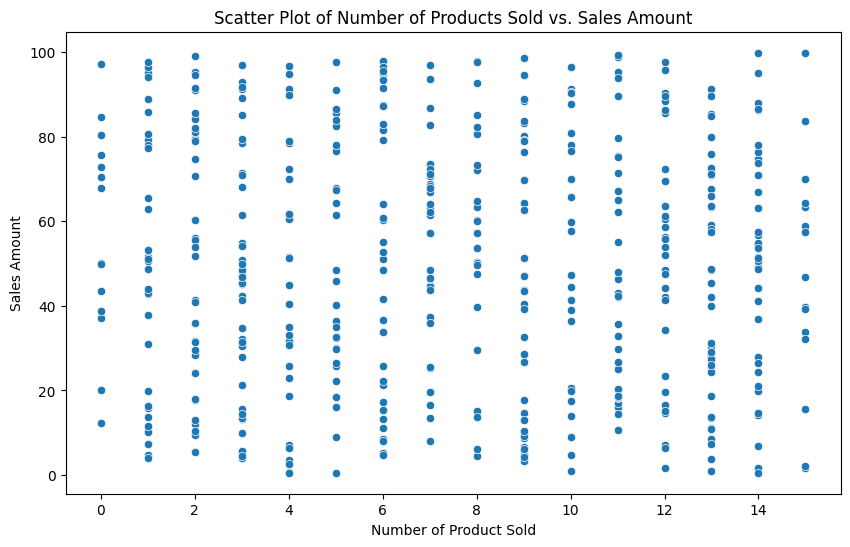

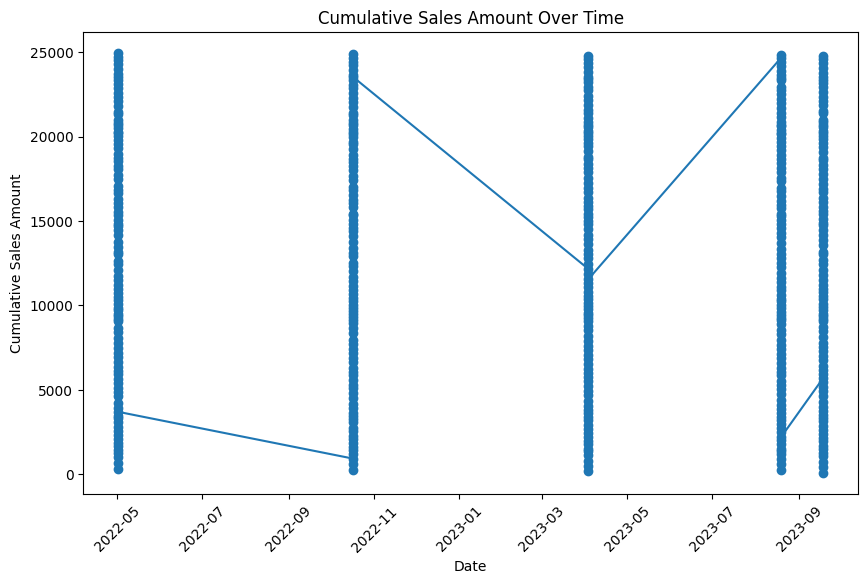

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Create DataFrame
df = pd.DataFrame(data)

# Convert "Sales Amount" to numeric
df['Sales Amount'] = df['Sales Amount'].replace('[\$,]', '', regex=True).astype(float)

# Create a new feature: Log of Sales Amount (handle zero or negative values if necessary)
df['Log Sales Amount'] = np.log1p(df['Sales Amount'])

# Create a new feature: Cumulative Sales Amount
df['Cumulative Sales Amount'] = df['Sales Amount'].cumsum()

# Create a new feature: Sales Amount Bins (e.g., low, medium, high)
bins = [0, 50, 100, np.inf]
labels = ['Low', 'Medium', 'High']
df['Sales Amount Bin'] = pd.cut(df['Sales Amount'], bins=bins, labels=labels)

# Histogram of Sales Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales Amount'], bins=20, kde=True)
plt.title('Histogram of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

# Box Plot of Sales Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales Amount'])
plt.title('Box Plot of Sales Amount')
plt.xlabel('Sales Amount')
plt.show()

# Scatter Plot of Number of Products Sold vs. Sales Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Product Sold', y='Sales Amount', data=df)
plt.title('Scatter Plot of Number of Products Sold vs. Sales Amount')
plt.xlabel('Number of Product Sold')
plt.ylabel('Sales Amount')
plt.show()

# Line Plot of Cumulative Sales Amount Over Time
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values(by='Date')

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Cumulative Sales Amount'], marker='o')
plt.title('Cumulative Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales Amount')
plt.xticks(rotation=45)
plt.show()
